
Summary statistics:

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000            

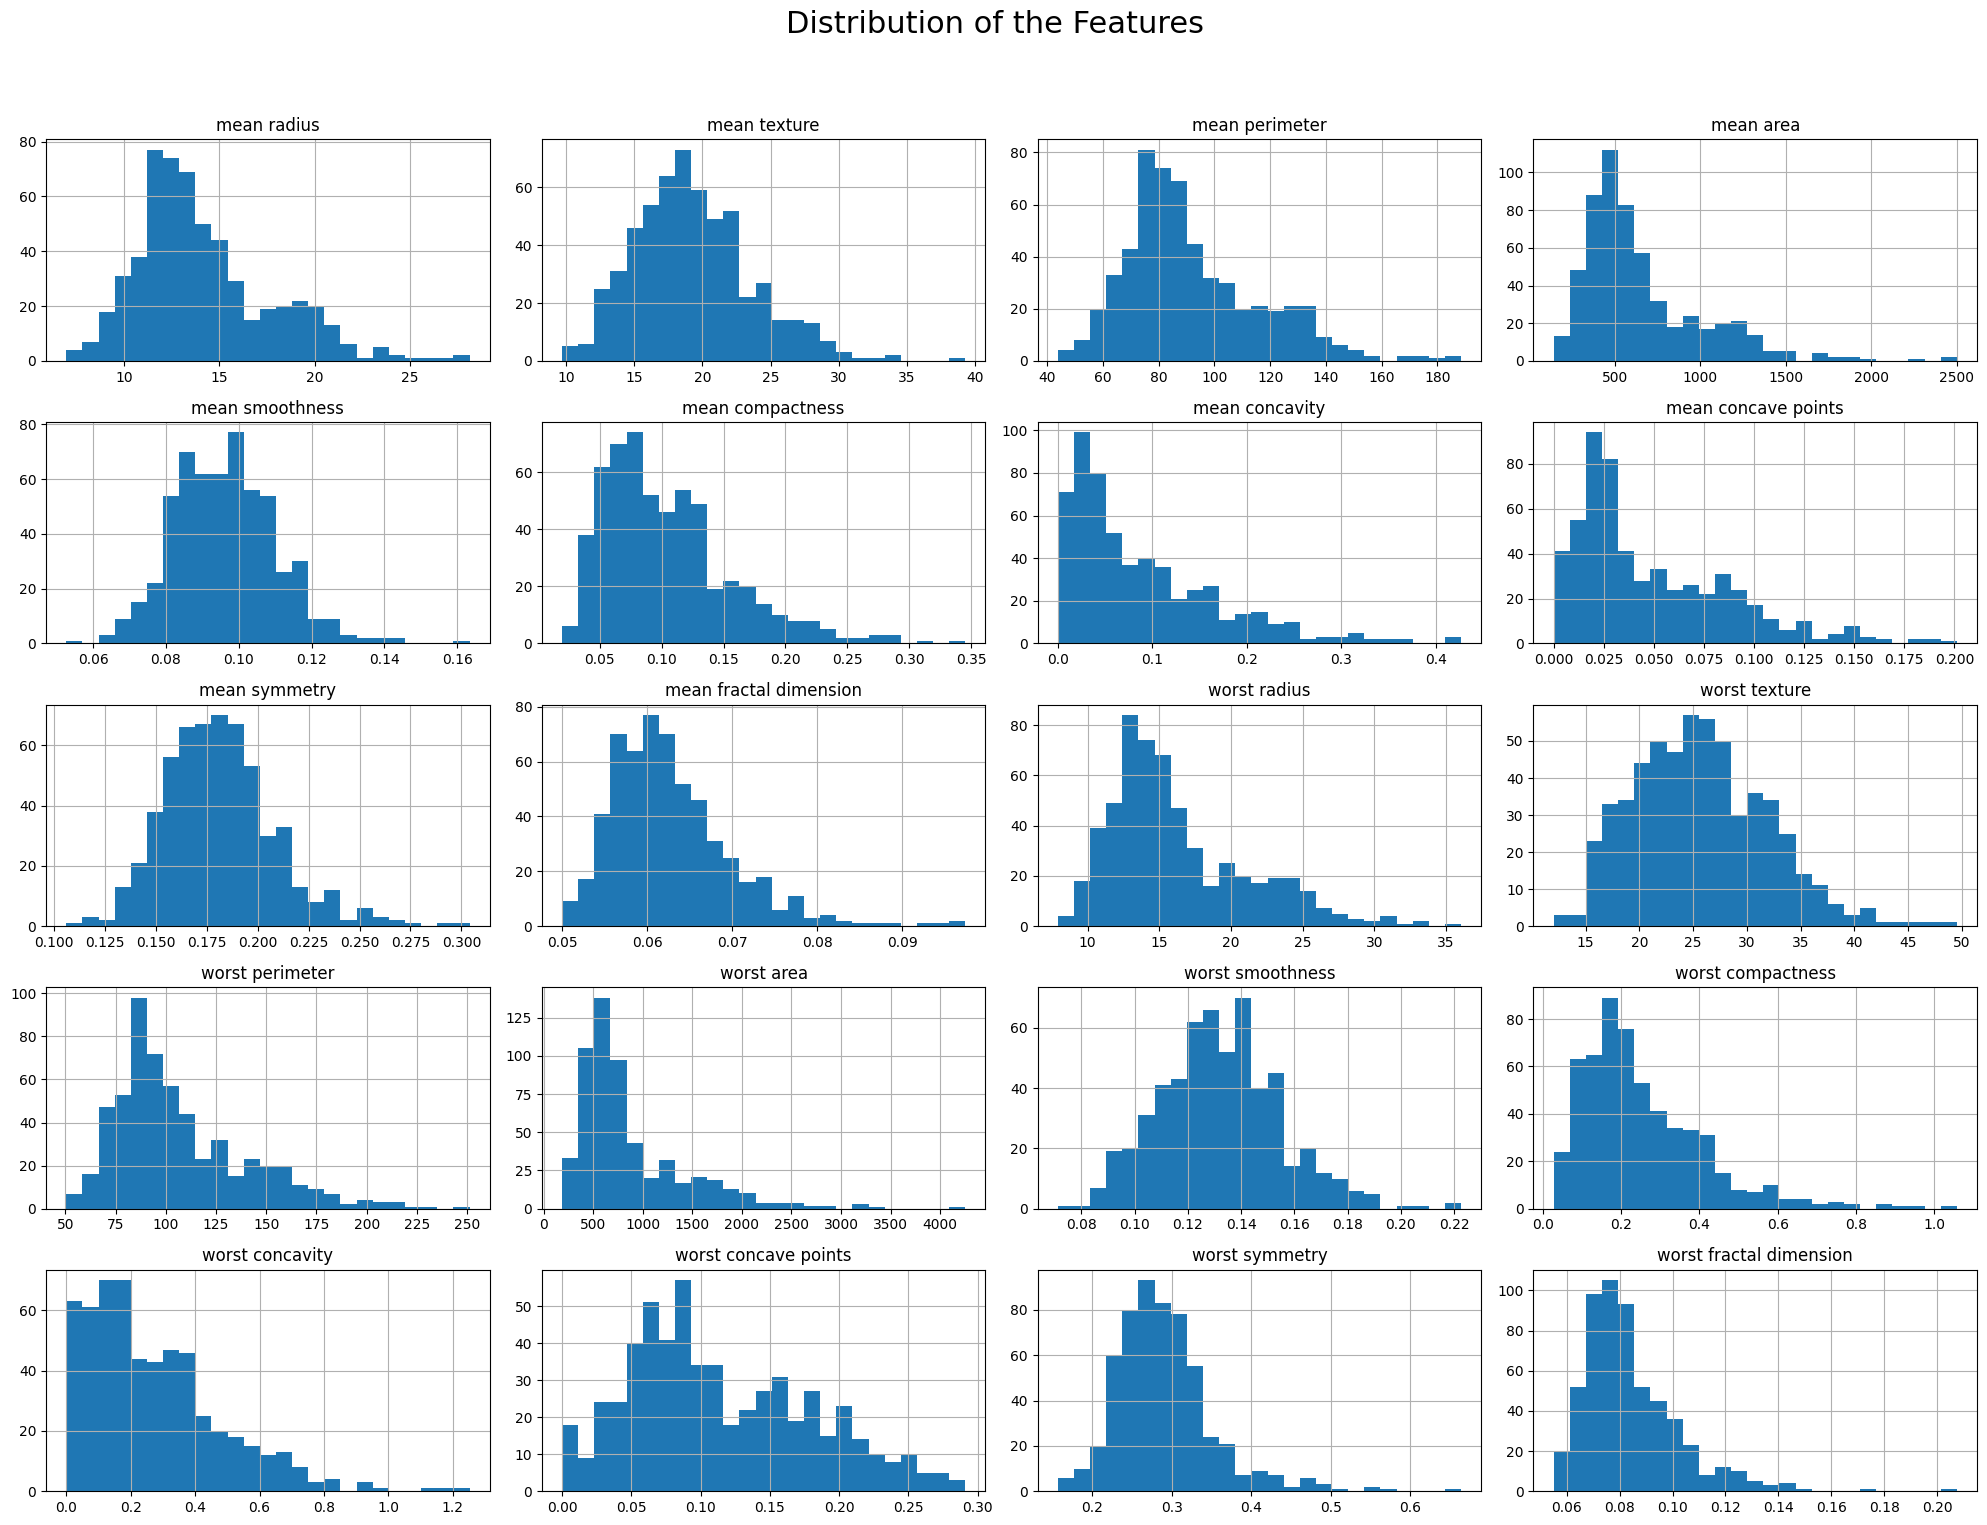

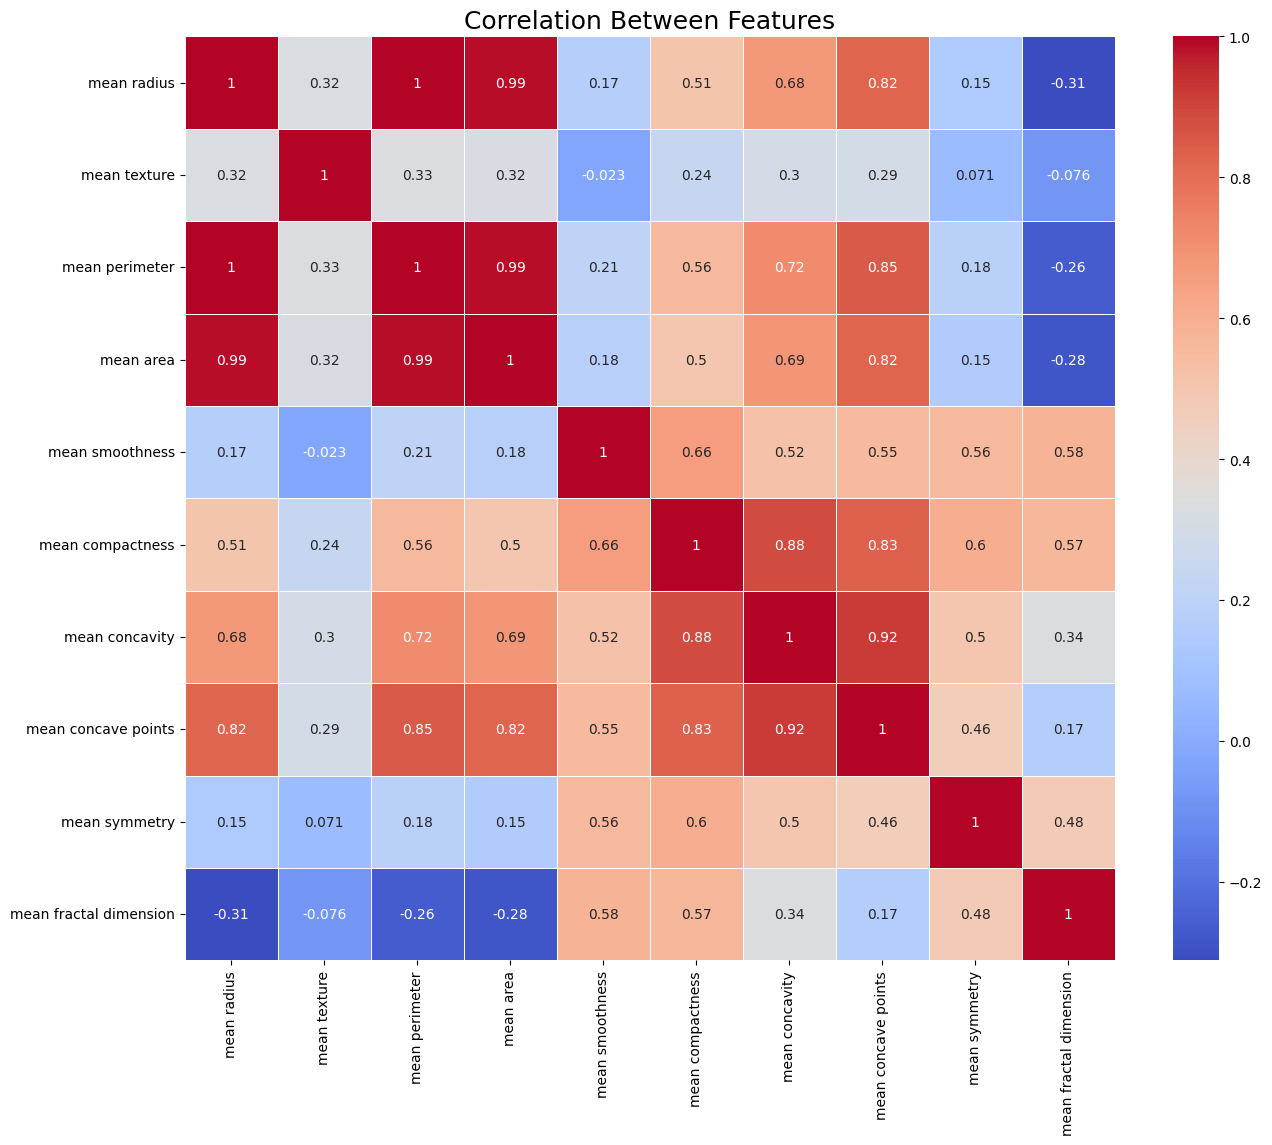

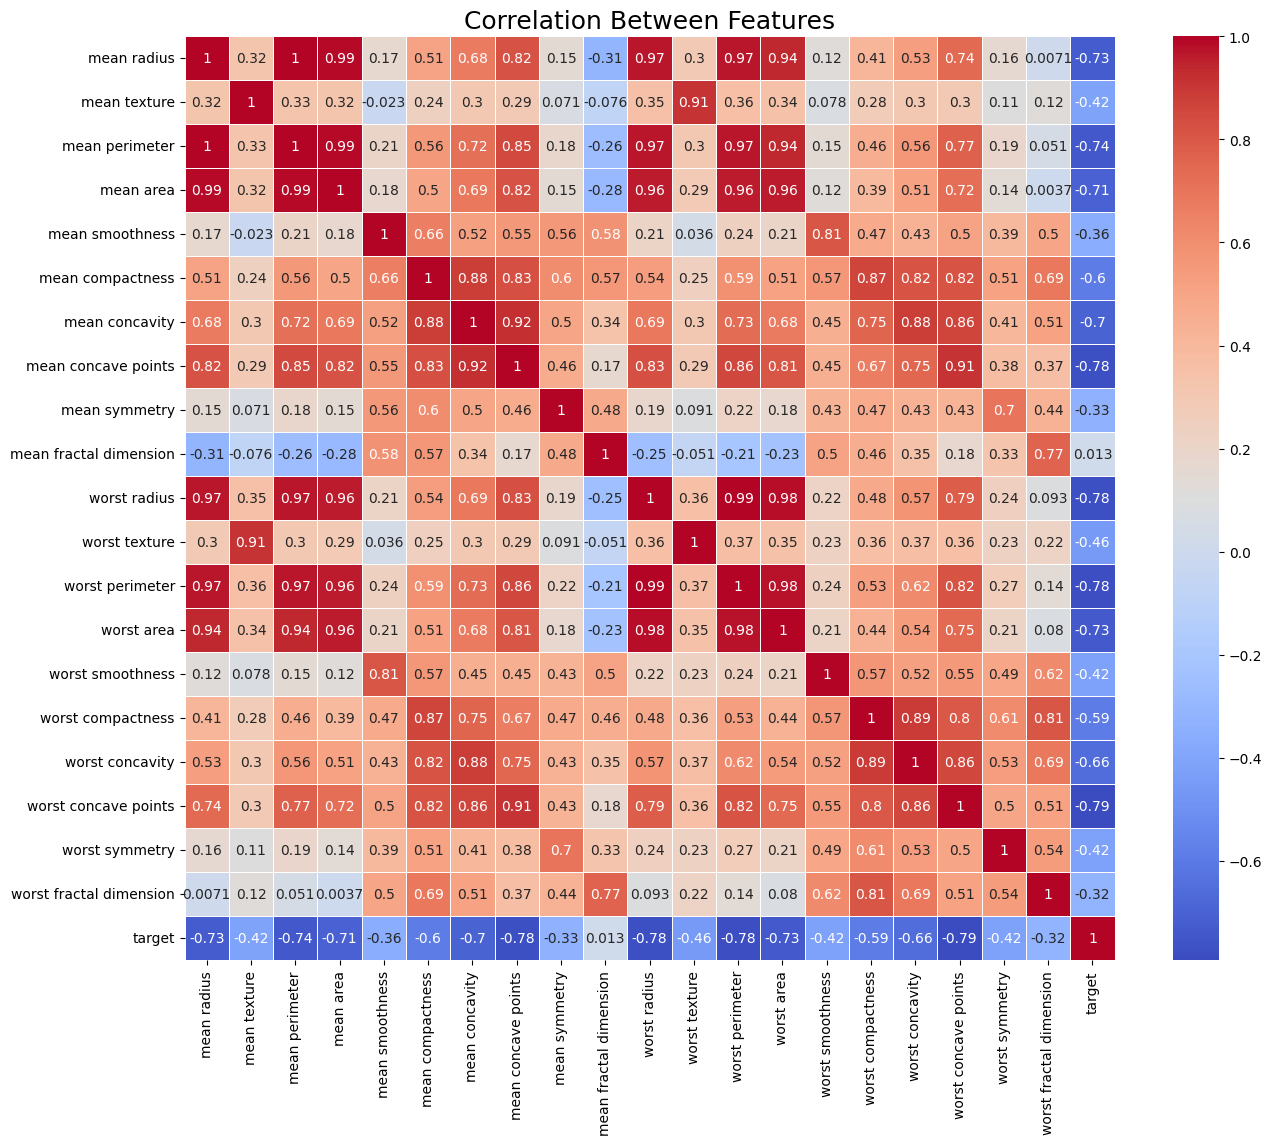

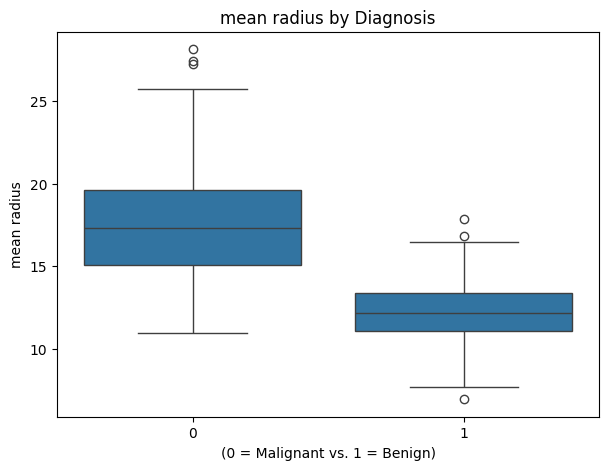

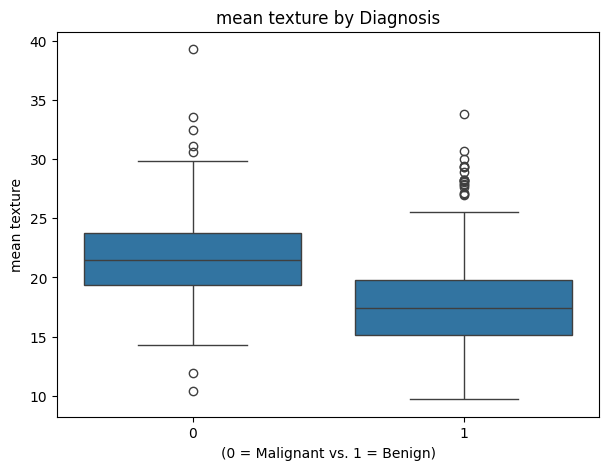

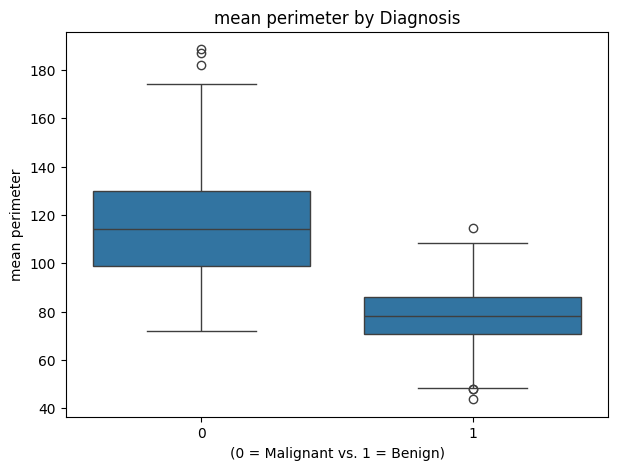

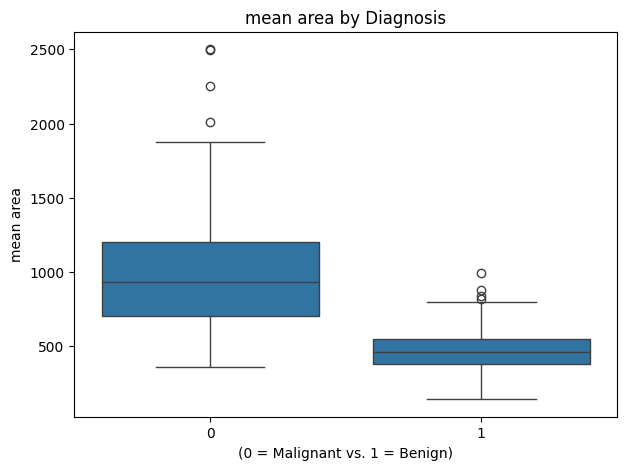

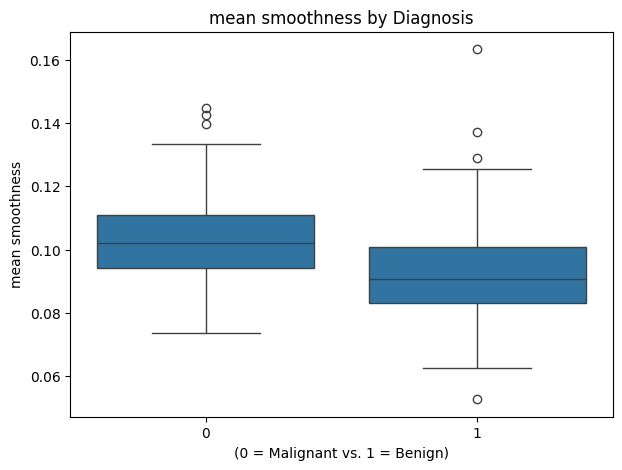

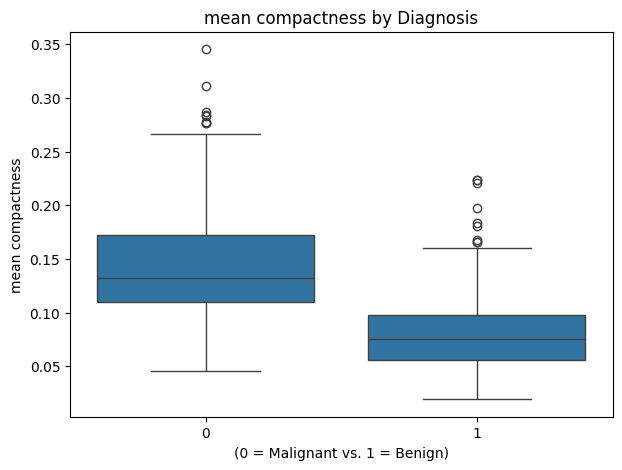

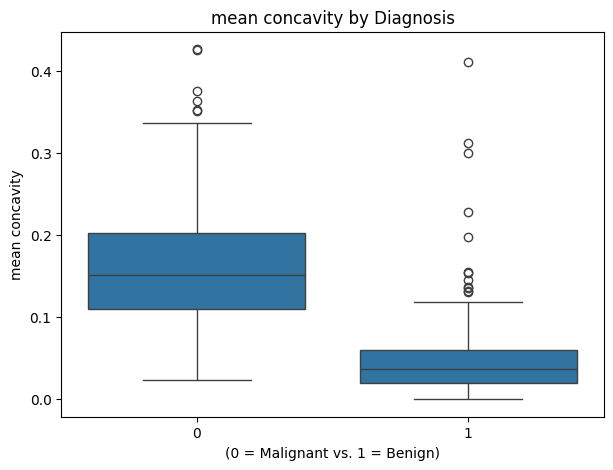

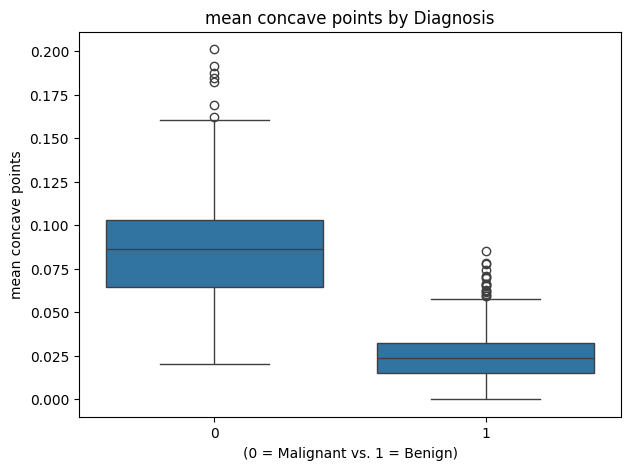

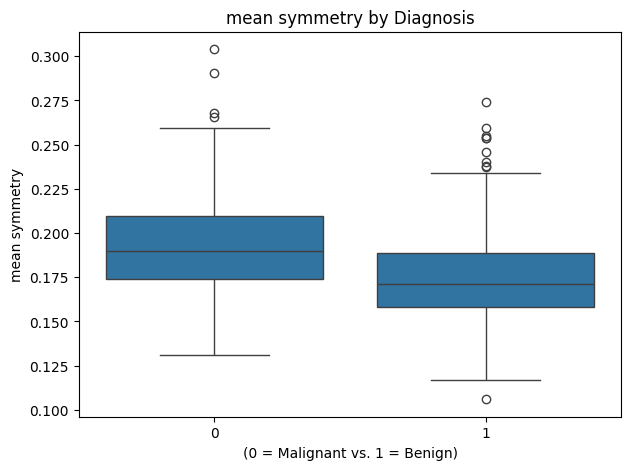

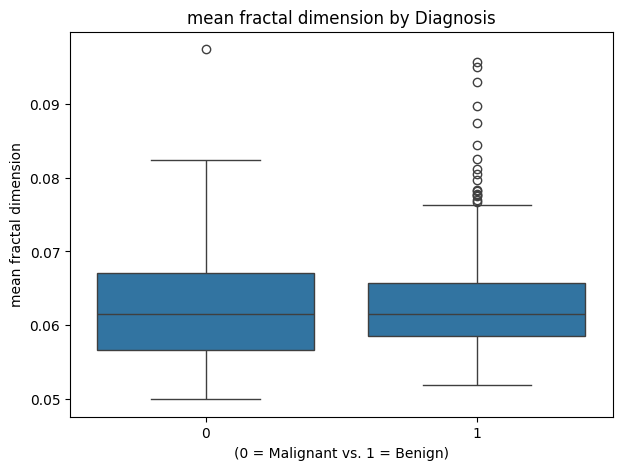

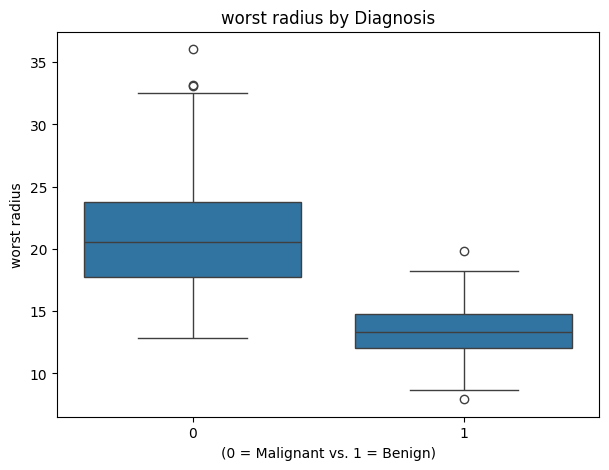

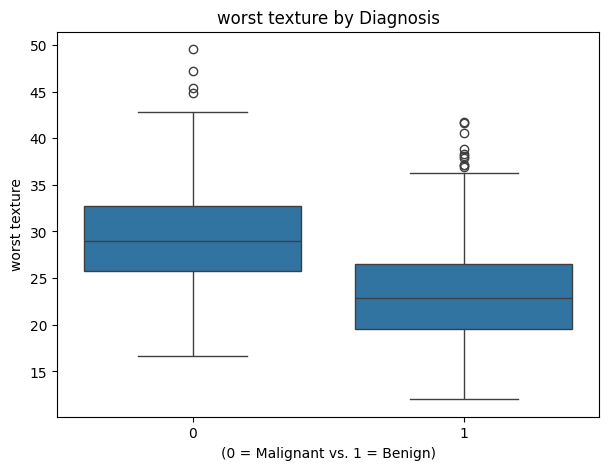

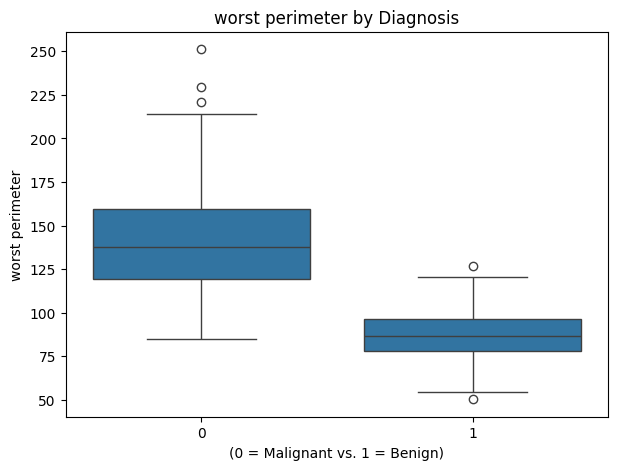

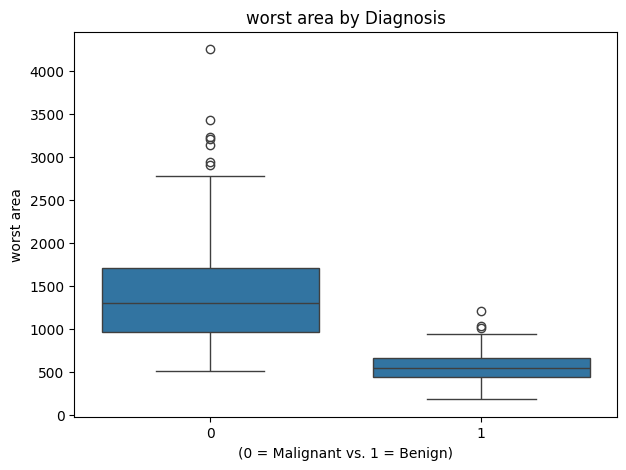

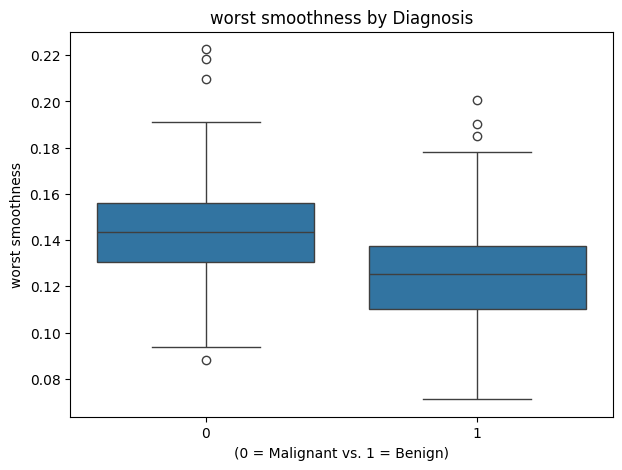

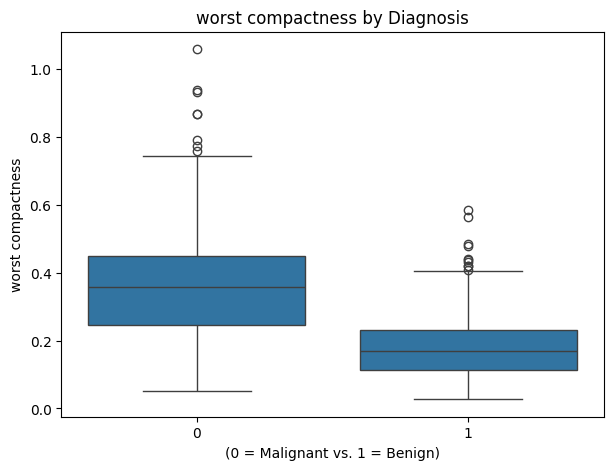

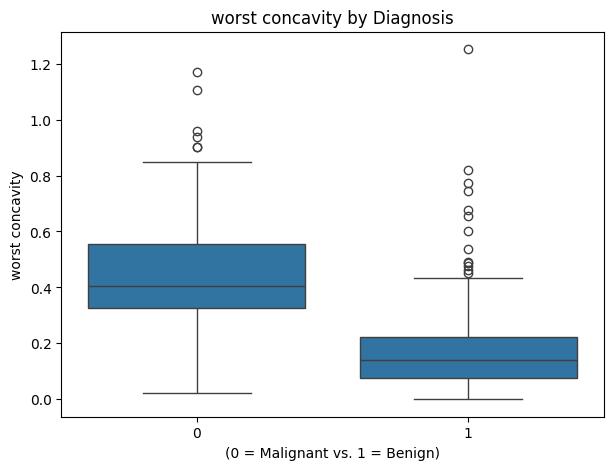

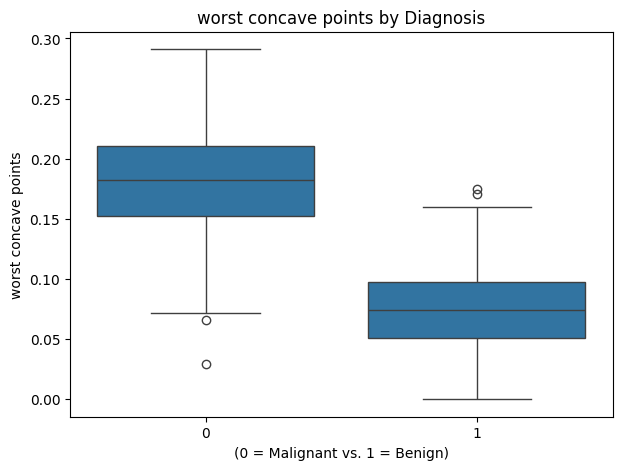

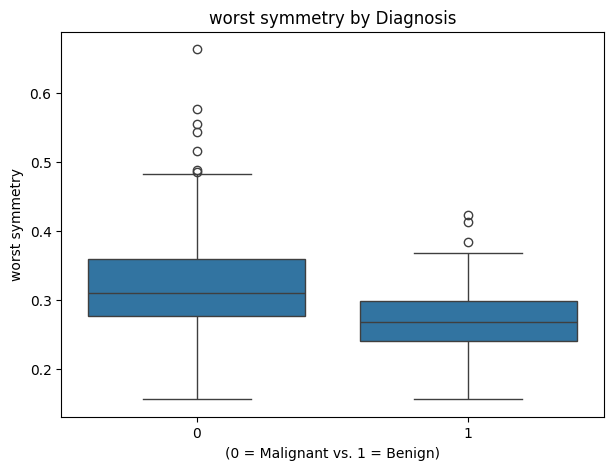

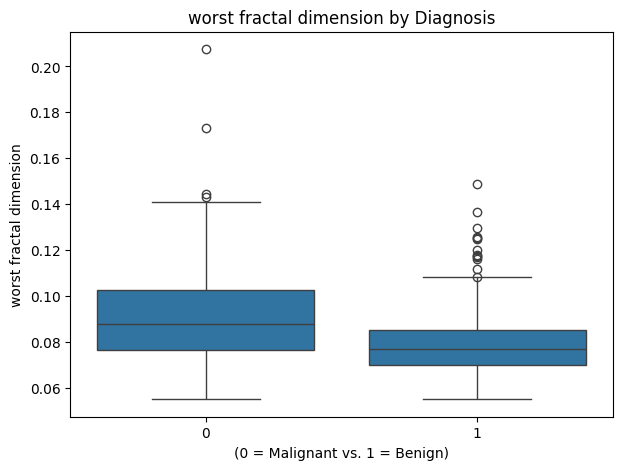

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Load the breast cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Summary statistics
print("\nSummary statistics:\n")
print(df.describe())

# Visualization of Feature Distribution
mean_features = [col for col in df.columns if col.startswith('mean ')]

worst_features = [col for col in df.columns if col.startswith('worst ')]
combined_features = mean_features + worst_features
df[combined_features].hist(bins=25, figsize=(20, 16), layout=(5, 4))
plt.suptitle('Distribution of the Features', fontsize=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

'''
# Correlation Heatmap
mean_features_only = [col for col in df.columns if col.startswith('mean ')]
mean_features = mean_features_only + ['target']
'''
combined_features_with_target = combined_features + ['target']

# just Mean Heatmap
plt.figure(figsize=(15,12))
mean_corr_matrix = df[mean_features].corr()
sns.heatmap(mean_corr_matrix, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Correlation Between Features', fontsize=18)
plt.show()

# Both Mean and Worst Heatmap
plt.figure(figsize=(15,12))
combined_corr_matrix = df[combined_features_with_target].corr()
sns.heatmap(combined_corr_matrix, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Correlation Between Features', fontsize=18)
plt.show()

# Differences in Data Between Benign and Malignant Cases
for feature in combined_features:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x='target', y=feature)
    plt.title(f'{feature} by Diagnosis')
    plt.xlabel('(0 = Malignant vs. 1 = Benign)')
    plt.ylabel(feature)
    plt.show()

In [ ]:
# remove self-correlation
target_corr = combined_corr_matrix['target'].drop('target')

top_features = target_corr.abs().sort_values(ascending=False)

# showing the correlation of feature and target value
# the higher the better
print(top_features)


worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
mean fractal dimension     0.012838
Name: target, dtype: float64


In [ ]:

# Get the full correlation matrix
corr_matrix = df[combined_features_with_target].corr()
corr_pairs = corr_matrix.unstack()

# Drop duplicate pairs
corr_pairs = corr_pairs.groupby(lambda x: tuple(sorted(x))).mean()

# Sort by absolute correlation value
sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)

high_corr_pairs = sorted_corr_pairs[(sorted_corr_pairs.abs() >= 0.75) & (sorted_corr_pairs.abs() < 1)]
print(high_corr_pairs)


(mean perimeter, mean radius)                        0.997855
(worst perimeter, worst radius)                      0.993708
(mean area, mean radius)                             0.987357
(mean area, mean perimeter)                          0.986507
(worst area, worst radius)                           0.984015
(worst area, worst perimeter)                        0.977578
(mean perimeter, worst perimeter)                    0.970387
(mean radius, worst radius)                          0.969539
(mean perimeter, worst radius)                       0.969476
(mean radius, worst perimeter)                       0.965137
(mean area, worst radius)                            0.962746
(mean area, worst area)                              0.959213
(mean area, worst perimeter)                         0.959120
(mean perimeter, worst area)                         0.941550
(mean radius, worst area)                            0.941082
(mean concave points, mean concavity)                0.921391
(mean te

Features Chosen: worst concave points, worst area, worst texture

worst concave points    0.793566

X worst perimeter         0.782914

X mean concave points     0.776614

X worst radius            0.776454

X mean perimeter          0.742636

worst area              0.733825

X mean radius             0.730029

X mean area               0.708984

X mean concavity          0.696360

X worst concavity         0.659610

X mean compactness           0.596534

X worst compactness          0.590998

worst texture              0.456903

--------------------------------------------------

worst smoothness           0.421465

worst symmetry             0.416294

X mean texture               0.415185

X mean smoothness            0.358560

mean symmetry              0.330499

worst fractal dimension    0.323872

X mean fractal dimension     0.012838